In [41]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import Pipeline
import seaborn as sns
from tqdm import tqdm

In [3]:
wisconsin = pd.read_csv("C:/Python/Cases/Wisconsin/BreastCancer.csv", index_col=0)
y = wisconsin['Class']
X = wisconsin.drop('Class', axis=1)

In [7]:
prcomp = PCA().set_output(transform='pandas')
X_pca = prcomp.fit_transform( X )
X.shape, X_pca.shape

((699, 9), (699, 9))

In [9]:
np.cumsum( prcomp.explained_variance_ratio_ )*100

array([ 68.92148641,  76.17490546,  82.27277194,  86.70847108,
        90.60818755,  94.06577109,  96.59348125,  98.86016534,
       100.        ])

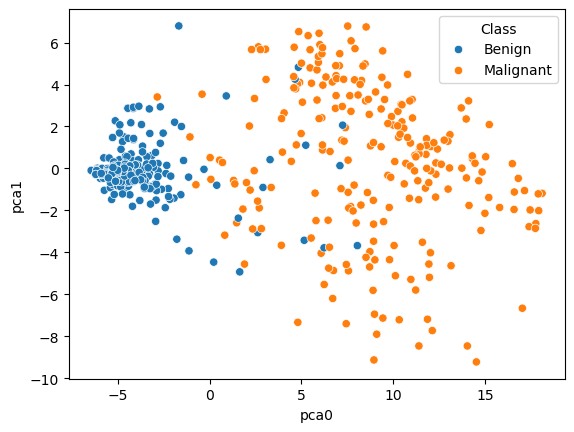

In [12]:
pc_data = X_pca.copy()
pc_data['Class'] = y
sns.scatterplot( data=pc_data, x='pca0',y='pca1', hue='Class' )
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25,
                                                    stratify=y)

In [19]:
prcomp = PCA().set_output(transform='pandas')
X_trn_pca = prcomp.fit_transform(X_train)
X_trn_pca = X_trn_pca.iloc[:,:2]
X_tst_pca = prcomp.transform(X_test)
X_tst_pca = X_tst_pca.iloc[:,:2]
svm = SVC(kernel='linear')
svm.fit(X_trn_pca, y_train)
y_pred = svm.predict(X_tst_pca)
print( classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98       138
   Malignant       0.99      0.94      0.96        72

    accuracy                           0.98       210
   macro avg       0.98      0.97      0.97       210
weighted avg       0.98      0.98      0.98       210



#### Sonar

In [43]:
sonar = pd.read_csv("C:/Python/Cases/Sonar/Sonar.csv")
y = sonar['Class']
X = sonar.drop('Class', axis=1)

In [44]:
prcomp = PCA().set_output(transform='pandas')
X_pca = prcomp.fit_transform( X )
np.cumsum( prcomp.explained_variance_ratio_ )*100

array([ 31.97114948,  52.35420902,  60.9100287 ,  67.36935074,
        72.53350667,  76.9849085 ,  81.19260432,  83.82525634,
        86.05529291,  87.97711018,  89.54241909,  90.90169131,
        92.0718335 ,  93.02863462,  93.90195917,  94.66845369,
        95.38789418,  95.95348908,  96.48080302,  96.96892255,
        97.33482656,  97.62822359,  97.89613989,  98.13613319,
        98.36817442,  98.5840694 ,  98.740442  ,  98.88093899,
        99.01071282,  99.12911832,  99.22583825,  99.31676767,
        99.3928897 ,  99.46525952,  99.53526026,  99.6004099 ,
        99.65519659,  99.70772003,  99.7564731 ,  99.79689475,
        99.83634534,  99.87264255,  99.90014209,  99.9234881 ,
        99.94274362,  99.95760342,  99.96676745,  99.97463659,
        99.98174152,  99.98634739,  99.98952777,  99.99201079,
        99.9938669 ,  99.99537982,  99.99660719,  99.99767241,
        99.99845705,  99.99913228,  99.99966774, 100.        ])

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25,
                                                    stratify=y)

In [46]:
prcomp = PCA().set_output(transform='pandas')
X_trn_pca = prcomp.fit_transform(X_train)
X_trn_pca = X_trn_pca.iloc[:,:10]
X_tst_pca = prcomp.transform(X_test)
X_tst_pca = X_tst_pca.iloc[:,:10]
svm = SVC(kernel='linear')
svm.fit(X_trn_pca, y_train)
y_pred = svm.predict(X_tst_pca)
print( accuracy_score(y_test, y_pred) )

0.746031746031746


In [47]:
comps = np.arange(2, 50)
scores = []
for c in comps:
    X_trn_pca = prcomp.fit_transform(X_train)
    X_trn_pca = X_trn_pca.iloc[:,:c]
    X_tst_pca = prcomp.transform(X_test)
    X_tst_pca = X_tst_pca.iloc[:,:c]
    svm = SVC(kernel='linear')
    svm.fit(X_trn_pca, y_train)
    y_pred = svm.predict(X_tst_pca)
    scores.append([c, accuracy_score(y_test, y_pred) ])
df_scores = pd.DataFrame(scores, columns=['comps', 'score'])
df_scores.sort_values(['score','comps'], ascending=[False, True])

,comps,score
17,19,0.809524
23,25,0.809524
19,21,0.793651
22,24,0.793651
24,26,0.793651
25,27,0.793651
26,28,0.793651
27,29,0.793651
28,30,0.793651
29,31,0.793651


In [48]:
comps = np.arange(2, 50)
scores = []
for c in comps:
    prcomp = PCA(n_components=c).set_output(transform='pandas')
    X_trn_pca = prcomp.fit_transform(X_train)
    X_tst_pca = prcomp.transform(X_test)
    svm = SVC(kernel='linear')
    svm.fit(X_trn_pca, y_train)
    y_pred = svm.predict(X_tst_pca)
    scores.append([c, accuracy_score(y_test, y_pred) ])
df_scores = pd.DataFrame(scores, columns=['comps', 'score'])
df_scores.sort_values(['score','comps'], ascending=[False, True])

,comps,score
17,19,0.809524
23,25,0.809524
19,21,0.793651
22,24,0.793651
24,26,0.793651
25,27,0.793651
26,28,0.793651
27,29,0.793651
28,30,0.793651
29,31,0.793651


#### HR Data

In [36]:
hr = pd.read_csv("C:/Python/Cases/human-resources-analytics/HR_comma_sep.csv")
X = hr.drop('left', axis=1)
y = hr['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25,
                                                    stratify=y)

In [42]:
ohe = OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')
trns = make_column_transformer((ohe, make_column_selector(dtype_include=object) ), 
                               remainder='passthrough',
                               verbose_feature_names_out=False)
trns = trns.set_output(transform='pandas')
scaler = StandardScaler().set_output(transform='pandas')
svm = SVC()
comps = np.arange(2, 16)
scores = []
for c in tqdm(comps):
    prcomp = PCA(n_components=c).set_output(transform='pandas')
    pipe = Pipeline([('OHE',trns),('SCL',scaler),('PCA',prcomp),('SVM',svm)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    scores.append( [c, accuracy_score(y_test, y_pred)] )
df_scores = pd.DataFrame(scores, columns=['comps', 'score'])
df_scores.sort_values(['score','comps'], ascending=[False, True])

100%|██████████| 14/14 [00:23<00:00,  1.69s/it]


,comps,score
13,15,0.944654
12,14,0.941098
11,13,0.933096
10,12,0.931096
9,11,0.930651
6,8,0.928206
8,10,0.927984
7,9,0.927317
5,7,0.927095
4,6,0.925761
